여러 텐서들의 흐름에 대해 웨이트를 공유하는 레이어에 대해 공부해봅시다. 그 예로서 <br>
hA = a * xA + b <br>
hB = a * xB + b <br>
y = hA * hB <br>
관계를 만족시키는 데이터에서 a, b 를 발견해 봅시다. 초기 웨이트에 따라서 학습이 잘 않될 수도 있으므로 여러번 실행해 봅시다.

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           shared[0][0]                 

800/800 [==============================] - 0s 249us/sample - loss: 2.2189e-11 - val_loss: 2.4491e-11
Epoch 62/200
800/800 [==============================] - 0s 222us/sample - loss: 2.1378e-11 - val_loss: 2.1678e-11
Epoch 63/200
800/800 [==============================] - 0s 222us/sample - loss: 1.5147e-11 - val_loss: 9.2146e-12
Epoch 64/200
800/800 [==============================] - 0s 244us/sample - loss: 8.2170e-12 - val_loss: 9.2146e-12
Epoch 65/200
800/800 [==============================] - 0s 227us/sample - loss: 8.2170e-12 - val_loss: 9.2146e-12
Epoch 66/200
800/800 [==============================] - 0s 236us/sample - loss: 8.2170e-12 - val_loss: 9.2146e-12
Epoch 67/200
800/800 [==============================] - 0s 226us/sample - loss: 8.2170e-12 - val_loss: 9.2146e-12
Epoch 68/200
800/800 [==============================] - 0s 227us/sample - loss: 8.2170e-12 - val_loss: 9.2146e-12
Epoch 69/200
800/800 [==============================] - 0s 242us/sample - loss: 8.2170e-12 - val_loss

800/800 [==============================] - 0s 244us/sample - loss: 1.5002e-14 - val_loss: 3.4227e-14
Epoch 133/200
800/800 [==============================] - 0s 242us/sample - loss: 1.5002e-14 - val_loss: 3.4227e-14
Epoch 134/200
800/800 [==============================] - 0s 226us/sample - loss: 1.5002e-14 - val_loss: 3.4227e-14
Epoch 135/200
800/800 [==============================] - 0s 226us/sample - loss: 1.5002e-14 - val_loss: 3.4227e-14
Epoch 136/200
800/800 [==============================] - 0s 249us/sample - loss: 1.5002e-14 - val_loss: 3.4227e-14
Epoch 137/200
800/800 [==============================] - 0s 244us/sample - loss: 2.6695e-14 - val_loss: 3.4227e-14
Epoch 138/200
800/800 [==============================] - 0s 233us/sample - loss: 1.6491e-14 - val_loss: 3.4227e-14
Epoch 139/200
800/800 [==============================] - 0s 226us/sample - loss: 4.8986e-14 - val_loss: 3.4227e-14
Epoch 140/200
800/800 [==============================] - 0s 226us/sample - loss: 1.5002e-14 - 

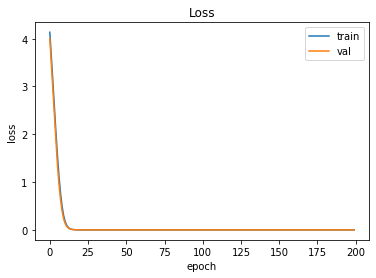

shared_weights
 [array([[-1.9999243]], dtype=float32), array([-0.9999565], dtype=float32)] 



In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2; b = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train = (a * x_train_A + b) * (a * x_train_B + b)

shared_layer = layers.Dense(1, name='shared')

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
sA = shared_layer(xA)
sB = shared_layer(xB)
y = layers.Multiply(name='mul')([sA, sB])

model = models.Model([xA, xB], y)
model.summary()

model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train,
                 batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

shared_weights = model.get_layer('shared').get_weights()
print('shared_weights\n', shared_weights, '\n')